In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Windows용 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
# font_name = "내가 사용하고자 하는 글꼴"

# 시간대별 따릉이 이용정보

- 출퇴근시간에 한해서
    - 출근시간: 6 - 10시 (대여시간: 6, 7, 8, 9)
    - 퇴근시간: 16 - 20시 (대여시간: 16, 17, 18, 19)

In [4]:
dec_df = pd.read_csv("./data/서울특별시 공공자전거 이용정보(시간대별)_202412.csv", encoding = "CP949")

In [5]:
dec_df.shape

(2126133, 12)

In [6]:
dec_df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21
3,2024-12-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,24.01,0.19,808.44,6
4,2024-12-01,0,1260,1260. 방이동 한양3차아파트 옆,정기권,NaN,20대,1,92.85,0.94,4042.55,35


In [16]:
dec_df.tail()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
2126128,2024-12-31,23,2547,2547. 반포래미안 리오센트,정기권,M,기타,1,143.46,1.05,4528.32,68
2126129,2024-12-31,23,3680,3680. 강동역3번출구,정기권,M,기타,1,0.00,0.00,0.00,2
2126130,2024-12-31,23,240,240. 문래역 4번출구 앞,정기권,M,기타,1,18.28,0.16,710.00,9
2126131,2024-12-31,23,5773,5773. 송파시그니처롯데캐슬,정기권,M,기타,1,39.75,0.36,1544.25,18
2126132,2024-12-31,23,1911,1911. 구로디지털단지역 앞,정기권,M,기타,1,17.09,0.15,634.55,5


In [17]:
dec_df["대여일자"].unique()
# 12월 전체 대여 데이터

array(['2024-12-01', '2024-12-02', '2024-12-03', '2024-12-04',
       '2024-12-05', '2024-12-06', '2024-12-07', '2024-12-08',
       '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12',
       '2024-12-13', '2024-12-14', '2024-12-15', '2024-12-16',
       '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
       '2024-12-21', '2024-12-22', '2024-12-23', '2024-12-24',
       '2024-12-25', '2024-12-26', '2024-12-27', '2024-12-28',
       '2024-12-29', '2024-12-30', '2024-12-31'], dtype=object)

In [18]:
dec_df["대여시간"].unique()
# 빌린 시간을 기점으로 시간대별 분류한 것으로 보임

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [19]:
dec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126133 entries, 0 to 2126132
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 194.7+ MB


- 대여일자가 object 타입으로 datetime 으로 변환 필요할지도
- 대여소번호가 int 타입이나 object로 변환
- 우리의 플젝엔 대여일자, 대여시간, 대여소번호, 대여소명, 이용건수, 이동거리(M), 이용시간(분) 필요

In [20]:
dec_borrow = dec_df[["대여일자", "대여시간", "대여소번호", "대여소명", "이용건수", "이동거리(M)", "이용시간(분)"]]

In [21]:
# 출근시간(대여시간: 6 ~ 9)
dec_go_work = dec_borrow[dec_borrow["대여시간"].isin([6, 7, 8, 9])]
dec_go_work.head()

,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분)
5593,2024-12-01,6,1029,1029. 성내어울터,1,751.59,3
5594,2024-12-01,6,1150,1150. 송정역 1번출구,1,900.00,7
5595,2024-12-01,6,1957,1957. 구일고등학교 정문,1,980.00,14
5596,2024-12-01,6,1158,1158. 가양역 8번출구,1,944.78,15
5597,2024-12-01,6,1162,1162. 공항초등학교건너편,1,860.20,6


In [149]:
dec_go_work.groupby(["대여일자", "대여시간"])["이용건수"].sum()

대여일자        대여시간
2024-12-01  6        597
            7        954
            8       1729
            9       2310
2024-12-02  6       2325
                    ... 
2024-12-30  9       3705
2024-12-31  6       1647
            7       4370
            8       7115
            9       3570
Name: 이용건수, Length: 124, dtype: int64

In [203]:
dec_go_work_table = dec_go_work.pivot_table(index = "대여일자", columns = "대여시간", values = "이용건수", aggfunc = "sum")

<Axes: xlabel='대여일자'>

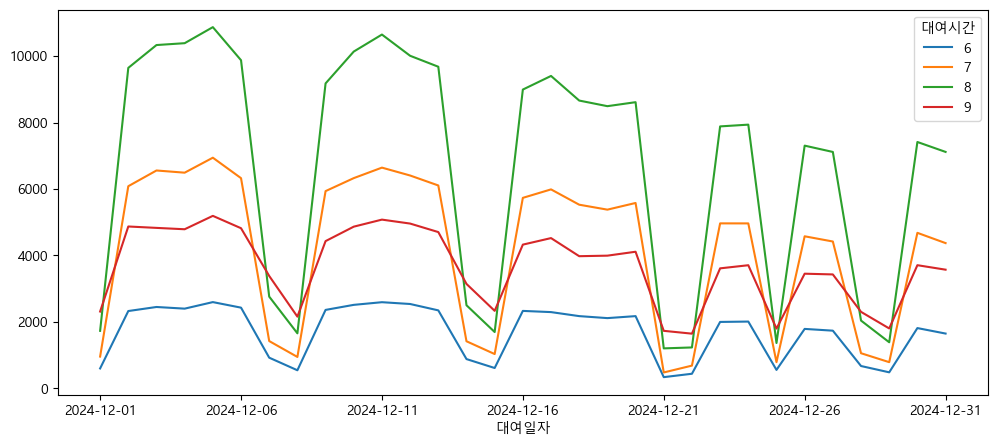

In [205]:
dec_go_work_table.plot(figsize = (12, 5))

<Axes: xlabel='대여일자'>

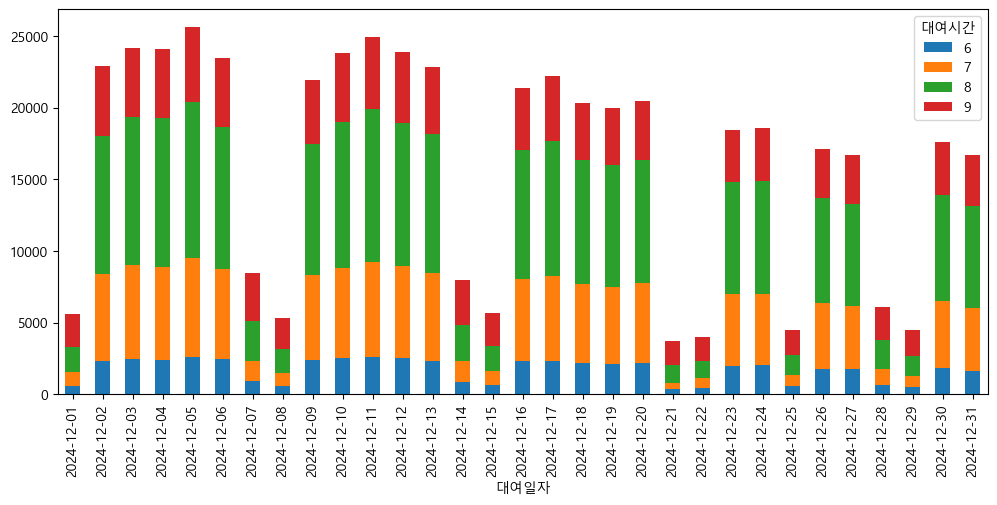

In [207]:
dec_go_work_table.plot(kind = "bar", stacked = True, figsize = (12, 5))

- 출근 시간대 중 8시에 가장 높은 따릉이 이용수를 보유
    - 7시, 9시, 6시 순서로 이용수가 많음
      
- 주말 및 공휴일에 사용량이 급감
    - 출근하는 평일에 사용량이 많은 걸 보아 출근 시간에 따릉이 이용이 증가하는 것으로 보임
        - 이에 비해 지하철 혼잡도 상태는 어떤지 파악해야 함
        - 따릉이 대여소 위치가 지하철을 대체하기에 적절한지 파악

In [117]:
# 퇴근시간(대여시간: 16 ~ 19)
dec_leave_work = dec_borrow[dec_borrow["대여시간"].isin([16, 17, 18, 19])]
dec_leave_work.head()

,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분)
34248,2024-12-01,16,2720,2720.힐스테이트에코,1,494.48,5
34249,2024-12-01,16,3759,3759. 이대서울병원,1,528.88,6
34250,2024-12-01,16,5074,"5074. 마곡엠밸리14단지 버스정류장(마곡엠밸리11,12단지상가방면)",1,1125.16,7
34251,2024-12-01,16,1407,1407. 먹골역 1번출구 뒤,1,2999.19,15
34252,2024-12-01,16,734,734. 신트리공원 입구,1,1926.71,17


In [201]:
dec_leave_work.groupby(["대여일자", "대여시간"])["이용건수"].sum()

대여일자        대여시간
2024-12-01  16      5016
            17      4880
            18      4252
            19      3481
2024-12-02  16      6291
                    ... 
2024-12-30  19      4816
2024-12-31  16      5176
            17      5796
            18      5910
            19      3675
Name: 이용건수, Length: 124, dtype: int64

In [209]:
dec_leave_work_table = dec_leave_work.pivot_table(index = "대여일자", columns = "대여시간", values = "이용건수", aggfunc = "sum")

<Axes: xlabel='대여일자'>

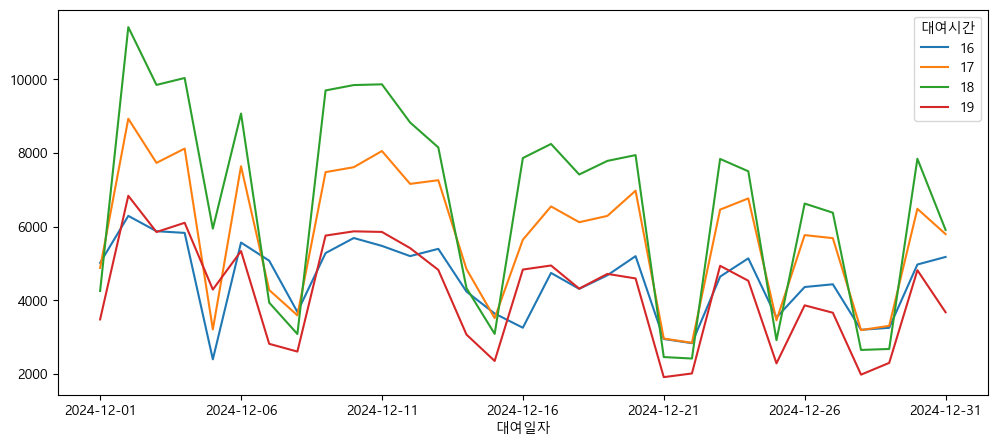

In [211]:
dec_leave_work_table.plot(figsize = (12, 5))

<Axes: xlabel='대여일자'>

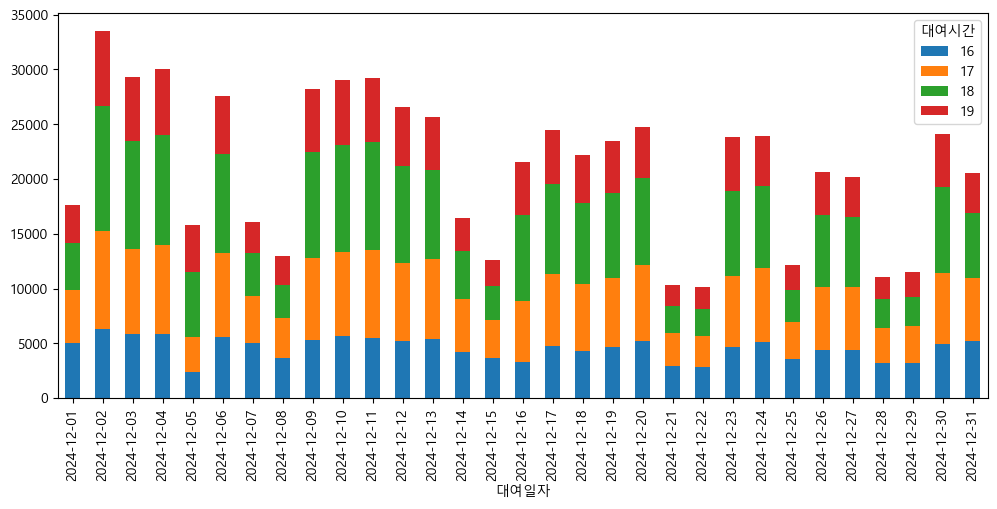

In [215]:
dec_leave_work_table.plot(kind = "bar", stacked = True, figsize = (12, 5))

- 출근 시간대 중 18시에 가장 높은 따릉이 이용수를 보유
    - 17시, (19시, 16시는 대체로 유사한 분포) 순서로 이용수가 많음
      
- 주말 및 공휴일에 사용량이 급감

- 출근시간 그래프와 대체로 유사
    - 하지만 평일과 주말에 따라 분명한 규칙성을 띄는 출근시간 그래프와 달리, 퇴근시간에서는 약간의 불규칙성 확인

## 연도별 출퇴근시간 따릉이 이용객

- 23 ~ 24년 월별 데이터를 연도별로 묶기
  
- 월별 데이터 공통되게 전처리
    - 대여일자, 대여시간, 대여소번호, 대여소명, 이용건수, 이동거리(M), 이용시간(분) 컬럼 추출하여 df 만들기
    - 출퇴근시간대만 추출
    - 대여소명에 대여소번호가 같이 있음
        - 제거하기

### 24년 출퇴근시간 따릉이 이용객

In [8]:
# rent_time_24 24년 전체 따릉이 이용객
rent_time_24 = pd.DataFrame(columns = ["대여일자", "대여시간", "대여소번호", "대여소명", "이용건수", "이동거리(M)", "이용시간(분)"])
for month in range(1, 13):
    month = format(month, '02')
    rent_time_month = pd.read_csv(f"./data/24년 공공자전거 이용정보(시간대별)/서울특별시 공공자전거 이용정보(시간대별)_2024{month}.csv", encoding = "CP949")
    rent_time_month = rent_time_month[["대여일자", "대여시간", "대여소번호", "대여소명", "이용건수", "이동거리(M)", "이용시간(분)"]]
    rent_time_24 = pd.concat([rent_time_24, rent_time_month], axis = 0)

C:\Users\ITSC\AppData\Local\Temp\ipykernel_7696\3996819958.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rent_time_24 = pd.concat([rent_time_24, rent_time_month], axis = 0)


In [12]:
rent_time_24.tail()

,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분)
2126128,2024-12-31,23,2547,2547. 반포래미안 리오센트,1,4528.32,68
2126129,2024-12-31,23,3680,3680. 강동역3번출구,1,0.00,2
2126130,2024-12-31,23,240,240. 문래역 4번출구 앞,1,710.00,9
2126131,2024-12-31,23,5773,5773. 송파시그니처롯데캐슬,1,1544.25,18
2126132,2024-12-31,23,1911,1911. 구로디지털단지역 앞,1,634.55,5


In [14]:
rent_time_24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39676932 entries, 0 to 2126132
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     object 
 2   대여소번호    object 
 3   대여소명     object 
 4   이용건수     object 
 5   이동거리(M)  float64
 6   이용시간(분)  object 
dtypes: float64(1), object(6)
memory usage: 2.4+ GB


In [16]:
rent_time_24.isna().sum()

대여일자       0
대여시간       0
대여소번호      0
대여소명       0
이용건수       0
이동거리(M)    0
이용시간(분)    0
dtype: int64

In [20]:
rent_time_24.shape

(39676932, 7)

In [ ]:
rent_time_24["대여소명"].unique()

In [24]:
tot = 0
for month in range(1, 13):
    month = format(month, '02')
    rent_time_month = pd.read_csv(f"./data/24년 공공자전거 이용정보(시간대별)/서울특별시 공공자전거 이용정보(시간대별)_2024{month}.csv", encoding = "CP949")
    tot += len(rent_time_month)


In [26]:
tot

39676932

In [30]:
rent_time_24.to_csv("./data/24년 공공자전거 이용정보(시간대별)/2024_따릉이_이용정보(시간대별)")

In [33]:
df = pd.read_csv("./data/2024_따릉이_이용정보(시간대별)", encoding = "UTF-8")

In [34]:
df.head()

,Unnamed: 0,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분)
0,0,2024-01-01,0,1175,1175. 대한항공 인력개발센터,1,582.54,4
1,1,2024-01-01,0,669,669.청계한신휴플러스앞 삼거리,1,1424.60,43
2,2,2024-01-01,0,5760,5760. 풍납사거리 성내유수지,1,1141.34,7
3,3,2024-01-01,0,1153,"1153. 발산역 1번, 9번 인근 대여소",1,3577.09,25
4,4,2024-01-01,0,1265,1265. 문정동 근린공원,1,2004.37,15


- 24년 데이터가 모두 잘 합쳐졌음
    - csv로 저장

In [32]:
# 출근시간(대여시간: 6 ~ 10)
go_work_24 = rent_time_24[rent_time_24["대여시간"].isin([6, 7, 8, 9])]
go_work_24.head()

,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분)
6245,2024-01-01,6,669,669.청계한신휴플러스앞 삼거리,1,1500.00,7
6246,2024-01-01,6,5862,5862. 당산역11번출구,1,1116.67,5
6247,2024-01-01,6,734,734. 신트리공원 입구,1,0.00,2
6248,2024-01-01,6,744,744. 신목동역 2번 출구,1,731.56,4
6249,2024-01-01,6,1447,1447. 면목역 3번출구,1,1750.00,9


In [34]:
go_work_24.shape

(7519436, 7)

In [37]:
go_work_24.to_csv("./data/24년 공공자전거 이용정보(시간대별)/2024_따릉이_이용정보(출근시간)")

NameError: name 'go_work_24' is not defined

In [40]:
# 퇴근시간(대여시간: 16 ~ 20)
leave_work_24 = rent_time_24[rent_time_24["대여시간"].isin([16, 17, 18, 19])]
leave_work_24.head()

,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분)
24980,2024-01-01,16,3122,3122.북가좌삼거리2,1,3106.42,33
24981,2024-01-01,16,5074,"5074. 마곡엠밸리14단지 버스정류장(마곡엠밸리11,12단지상가방면)",1,176.29,3
24982,2024-01-01,16,1129,1129. 화곡역 1번 출구 앞,1,2280.00,39
24983,2024-01-01,16,734,734. 신트리공원 입구,2,3499.48,48
24984,2024-01-01,16,736,736. 오솔길공원,1,2104.83,12


In [42]:
leave_work_24.shape

(11857772, 7)

In [46]:
leave_work_24.to_csv("./data/24년 공공자전거 이용정보(시간대별)/2024_따릉이_이용정보(퇴근시간)")

### 대여소명 전처리

- 대여소명에 번호가 같이 붙음
    - 제거

In [ ]:
go_work_24 = pd.read_csv("./data/24년 공공자전거 이용정보(시간대별)/2024_따릉이_이용정보(출근시간)")

In [ ]:
# 기존 인덱스 드랍
go_work_24 = go_work_24.drop("Unnamed: 0", axis = 1)

In [ ]:
# 대여소명 컬럼에 번호 빼고 이름만 추출
go_work_24["대여소명"] = go_work_24["대여소명"].map(lambda x: x.split(".", maxsplit = 1)[1].strip() if "." in x else x)

In [ ]:
go_work_24.to_csv("./data/24년 공공자전거 이용정보(시간대별)/2024_따릉이_이용정보(출근시간)")

In [ ]:
leave_work_24 = pd.read_csv("./data/24년 공공자전거 이용정보(시간대별)/2024_따릉이_이용정보(퇴근시간)")

In [ ]:
# 기존 인덱스 드랍
leave_work_24 = leave_work_24.drop("Unnamed: 0", axis = 1)

In [ ]:
# 대여소명 컬럼에 번호 빼고 이름만 추출
leave_work_24["대여소명"] = leave_work_24["대여소명"].map(lambda x: x.split(".", maxsplit = 1)[1].strip() if "." in x else x)

In [ ]:
leave_work_24.to_csv("./data/24년 공공자전거 이용정보(시간대별)/2024_따릉이_이용정보(퇴근시간)")

- 위의 코드는 다른 파일에서 이미 실행했음
    - 기록용으로 모아놓음

### 24년 출근시간 따릉이 이용정보 확인

- 데이터 중 이용건수가 20건이 넘는 이상한 데이터 발견

- 서울열린데이터광장 댓글에서 이유 확인
    - 각 데이터가 하나의 계정의 정보가 아니라,
    - 같은 날짜, 같은 시간대, 같은 장소에서 성별, 연령대코드도 같은 애들끼리 모아 놓은 것
    - 이용거리와 이용시간은 합계
        - 이용건수로 이용거리와 이용시간을 나눠서 사용해도 무방할듯

In [150]:
df = pd.read_csv("./data/2024_따릉이_이용정보(출근시간)", encoding = "utf-8")

In [151]:
df.head()

,Unnamed: 0,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분)
0,0,2024-01-01,6,669,청계한신휴플러스앞 삼거리,1,1500.00,7
1,1,2024-01-01,6,5862,당산역11번출구,1,1116.67,5
2,2,2024-01-01,6,734,신트리공원 입구,1,0.00,2
3,3,2024-01-01,6,744,신목동역 2번 출구,1,731.56,4
4,4,2024-01-01,6,1447,면목역 3번출구,1,1750.00,9


In [28]:
df.shape

(7519436, 8)

In [33]:
test = df[df["대여일자"] == "2024-01-02"]
test[test["대여소번호"] == 734]

,Unnamed: 0,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분)
4201,4201,2024-01-02,6,734,신트리공원 입구,1,498.56,3
4668,4668,2024-01-02,6,734,신트리공원 입구,1,1993.41,8
4758,4758,2024-01-02,6,734,신트리공원 입구,1,3410.00,17
5727,5727,2024-01-02,6,734,신트리공원 입구,1,1900.00,11
6611,6611,2024-01-02,7,734,신트리공원 입구,1,2080.00,8
7237,7237,2024-01-02,7,734,신트리공원 입구,1,1886.15,6
7307,7307,2024-01-02,7,734,신트리공원 입구,1,4099.88,24
10280,10280,2024-01-02,7,734,신트리공원 입구,1,2670.00,23
10821,10821,2024-01-02,7,734,신트리공원 입구,1,2015.08,12
11514,11514,2024-01-02,8,734,신트리공원 입구,1,3879.14,23


In [34]:
test[test["대여소번호"] == 1447]

,Unnamed: 0,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분)
6371,6371,2024-01-02,7,1447,면목역 3번출구,1,1280.00,8
6372,6372,2024-01-02,7,1447,면목역 3번출구,1,2900.00,19
11064,11064,2024-01-02,8,1447,면목역 3번출구,1,4696.94,25
14475,14475,2024-01-02,8,1447,면목역 3번출구,1,1280.00,7
16028,16028,2024-01-02,8,1447,면목역 3번출구,1,667.99,6
19141,19141,2024-01-02,9,1447,면목역 3번출구,1,847.84,6


In [36]:
test1 = df[df["대여일자"] == "2024-06-07"]
test1[test1["대여소번호"] == 1447]

,Unnamed: 0,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분)
2964580,2964580,2024-06-07,6,1447,면목역 3번출구,1,4385.78,25
2965468,2965468,2024-06-07,6,1447,면목역 3번출구,1,1455.56,13
2965559,2965559,2024-06-07,6,1447,면목역 3번출구,1,864.96,6
2965923,2965923,2024-06-07,6,1447,면목역 3번출구,1,1120.00,5
2967132,2967132,2024-06-07,6,1447,면목역 3번출구,1,1722.04,16
2968620,2968620,2024-06-07,7,1447,면목역 3번출구,1,1062.77,8
2970448,2970448,2024-06-07,7,1447,면목역 3번출구,1,1518.88,16
2974557,2974557,2024-06-07,7,1447,면목역 3번출구,1,1100.00,86
2974928,2974928,2024-06-07,7,1447,면목역 3번출구,1,2350.00,20
2977004,2977004,2024-06-07,8,1447,면목역 3번출구,1,2779.02,18


In [38]:
df[df["이용건수"] == 22]

,Unnamed: 0,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리(M),이용시간(분)
3105739,3105739,2024-06-12,8,2701,마곡나루역 5번출구 뒤편,22,18820.82,102


### 23년 출퇴근시간 따릉이 이용객

In [5]:
# rent_time_23 23년 전체 따릉이 이용객
rent_time_23 = pd.DataFrame(columns = ["대여일자", "대여시간", "대여소번호", "대여소명", "이용건수", "이동거리(M)", "이용시간(분)"])
for month in range(1, 13):
    month = format(month, '02')
    try:
        rent_time_month = pd.read_csv(f"./data/23년 공공자전거 이용정보(시간대별)/서울특별시 공공자전거 이용정보(시간대별)_23{month}.csv", encoding = "cp949")
    except UnicodeDecodeError:
        rent_time_month = pd.read_csv(f"./data/23년 공공자전거 이용정보(시간대별)/서울특별시 공공자전거 이용정보(시간대별)_23{month}.csv", encoding = "euc-kr")
        print(month)
        
    rent_time_month = rent_time_month[["대여일자", "대여시간", "대여소번호", "대여소명", "이용건수", "이동거리(M)", "이용시간(분)"]]
    rent_time_23 = pd.concat([rent_time_23, rent_time_month], axis = 0)

C:\Users\ITSC\AppData\Local\Temp\ipykernel_3484\1522031294.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rent_time_23 = pd.concat([rent_time_23, rent_time_month], axis = 0)


UnicodeDecodeError: 'euc_kr' codec can't decode byte 0x98 in position 172903: illegal multibyte sequence

In [13]:
len(rent_time_23["대여일자"].unique())

334

In [33]:
tot = 0
for month in range(1, 12):
    month = format(month, '02')
    rent_time_month = pd.read_csv(f"./data/23년 공공자전거 이용정보(시간대별)/서울특별시 공공자전거 이용정보(시간대별)_23{month}.csv", encoding = "CP949")
    tot += len(rent_time_month)

tot

38038756

In [31]:
pd.read_csv("./data/23년 공공자전거 이용정보(시간대별)/서울특별시 공공자전거 이용정보(시간대별)_2312.csv", encoding = "CP949")

UnicodeDecodeError: 'cp949' codec can't decode byte 0x98 in position 172903: illegal multibyte sequence

In [ ]:
tot = 0
for month in range(1, 13):
    month = format(month, '02')
    rent_time_month = pd.read_csv(f"./data/24년 공공자전거 이용정보(시간대별)/서울특별시 공공자전거 이용정보(시간대별)_2024{month}.csv", encoding = "CP949")
    tot += len(rent_time_month)

tot

In [ ]:
# 출근시간(대여시간: 6 ~ 10)
go_work_24 = rent_time_24[rent_time_24["대여시간"].isin([6, 7, 8, 9])]
go_work_24.head()

In [ ]:
go_work_24.to_csv("./data/24년 공공자전거 이용정보(시간대별)/2024_따릉이_이용정보(출근시간)")

In [ ]:
# 퇴근시간(대여시간: 16 ~ 20)
leave_work_24 = rent_time_24[rent_time_24["대여시간"].isin([16, 17, 18, 19])]
leave_work_24.head()

In [ ]:
leave_work_24.to_csv("./data/24년 공공자전거 이용정보(시간대별)/2024_따릉이_이용정보(퇴근시간)")

# 대여소별 대여/반납 승객수

- 월별 (2020 ~ 2025.2)
- 5분 단위

In [239]:
df = pd.read_csv("./data/tpss_bcycl_od_statnhm_20250320.csv", encoding = "CP949")

In [241]:
df.shape

(207040, 10)

In [245]:
df.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
0,20250320,출발시간,1410,ST-311,목1동_037_1,ST-2760,신정2동_021_1,1,3.0,333.0
1,20250320,출발시간,1900,ST-1855,문정1동_003_2,ST-839,송파2동_007_1,1,10.0,1738.0
2,20250320,출발시간,1140,ST-390,전농2동_005_1,ST-2513,"종로1,2,3,4가동_005_6",1,31.0,5881.0
3,20250320,출발시간,1745,ST-410,장안1동_003_1,ST-2075,월계3동_003_1,1,32.0,6208.0
4,20250320,출발시간,725,ST-1413,오금동_056_1,ST-930,거여2동_004_1,1,7.0,1028.0


In [247]:
df.tail()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
207035,20250320,도착시간,1845,ST-310,목4동_016_1,ST-1017,목5동_008_1,1,4.0,592.0
207036,20250320,도착시간,1250,ST-760,방배4동_032_1,ST-760,방배4동_032_1,1,46.0,6050.0
207037,20250320,도착시간,1620,ST-634,독산1동_011_1,ST-1938,가산동_003_4,1,25.0,3586.0
207038,20250320,도착시간,825,ST-180,무악동_016_1,ST-116,소공동_002_1,1,9.0,886.0
207039,20250320,도착시간,540,ST-2793,장위2동_005_1,ST-600,월계1동_011_1,1,6.0,823.0


In [255]:
df[(df["시작_대여소명"] == "목1동_037_1") & (df["종료_대여소명"] == "신정2동_021_1")].groupby("집계_기준").count()

,기준_날짜,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
집계_기준,,,,,,,,,
도착시간,13,13,13,13,13,13,13,13,13
출발시간,12,12,12,12,12,12,12,12,12


- 집계_기준이 도착, 출발시간으로 나뉘는데, 중복 데이터가 많음
    - 그렇다고 항상 두개씩 존재하는 것도 아님. 중복이 안 되는 경우도 있음....
    - 디테일한 정보가 있으나 전처리가 어려울 것으로 예상
        - 일단 대여/반납 나누지 말고 일별 총 이용자수로 분석해 보자

## 지하철 시간대별 승하차 인원 정보

In [45]:
df = pd.read_csv("./data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding = "cp949")

In [46]:
df.shape

(72415, 52)

In [47]:
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202502,1호선,동대문,578,9,9495,1624,7824,5414,12542,...,8325,799,2433,1,223,0,0,0,0,20250303
1,202502,1호선,동묘앞,134,3,2148,716,3171,4046,7739,...,3793,120,1517,1,207,0,0,0,0,20250303
2,202502,1호선,서울역,587,54,8095,7283,22011,47821,71085,...,23594,3738,6137,10,165,0,1,0,0,20250303
3,202502,1호선,시청,118,0,1599,4243,3071,22889,6368,...,3061,516,755,0,9,0,0,0,0,20250303
4,202502,1호선,신설동,329,14,7905,1925,8253,7009,19030,...,7506,406,2112,0,0,0,0,0,0,20250303


In [48]:
df.tail()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
72410,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
72411,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
72412,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
72413,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223
72414,201501,중앙선,회기,436,3,10929,3067,23317,10430,65043,...,35702,767,9314,0,0,0,0,0,0,20151223


In [49]:
df.columns

Index(['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원',
       '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원',
       '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원',
       '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원',
       '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원',
       '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원',
       '21시-22시 하차인원', '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원',
       '23시-24시 하차인원', '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원',
       '01시-02시 하차인원', '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원',
       '03시-04시 하차인원', '작업일자'],
      dtype='object')

In [50]:
df.dtypes

사용월              int64
호선명             object
지하철역            object
04시-05시 승차인원     int64
04시-05시 하차인원     int64
05시-06시 승차인원     int64
05시-06시 하차인원     int64
06시-07시 승차인원     int64
06시-07시 하차인원     int64
07시-08시 승차인원     int64
07시-08시 하차인원     int64
08시-09시 승차인원     int64
08시-09시 하차인원     int64
09시-10시 승차인원     int64
09시-10시 하차인원     int64
10시-11시 승차인원     int64
10시-11시 하차인원     int64
11시-12시 승차인원     int64
11시-12시 하차인원     int64
12시-13시 승차인원     int64
12시-13시 하차인원     int64
13시-14시 승차인원     int64
13시-14시 하차인원     int64
14시-15시 승차인원     int64
14시-15시 하차인원     int64
15시-16시 승차인원     int64
15시-16시 하차인원     int64
16시-17시 승차인원     int64
16시-17시 하차인원     int64
17시-18시 승차인원     int64
17시-18시 하차인원     int64
18시-19시 승차인원     int64
18시-19시 하차인원     int64
19시-20시 승차인원     int64
19시-20시 하차인원     int64
20시-21시 승차인원     int64
20시-21시 하차인원     int64
21시-22시 승차인원     int64
21시-22시 하차인원     int64
22시-23시 승차인원     int64
22시-23시 하차인원     int64
23시-24시 승차인원     int64
23시-24시 하차인원     int64
00시-01시 승차인

In [51]:
# 사용월 컬럼을 문자열 변환
df["사용월"] = df["사용월"].astype("str")

In [52]:
df["연도"] = df["사용월"].map(lambda x: x[:4])

In [53]:
df["월"] = df["사용월"].map(lambda x: x[-2:])

In [54]:
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,연도,월
0,202502,1호선,동대문,578,9,9495,1624,7824,5414,12542,...,2433,1,223,0,0,0,0,20250303,2025,02
1,202502,1호선,동묘앞,134,3,2148,716,3171,4046,7739,...,1517,1,207,0,0,0,0,20250303,2025,02
2,202502,1호선,서울역,587,54,8095,7283,22011,47821,71085,...,6137,10,165,0,1,0,0,20250303,2025,02
3,202502,1호선,시청,118,0,1599,4243,3071,22889,6368,...,755,0,9,0,0,0,0,20250303,2025,02
4,202502,1호선,신설동,329,14,7905,1925,8253,7009,19030,...,2112,0,0,0,0,0,0,20250303,2025,02


In [62]:
df[(df["사용월"] == "202502") & (df["지하철역"] == "서울역")]

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,연도,월
2,202502,1호선,서울역,587,54,8095,7283,22011,47821,71085,...,6137,10,165,0,1,0,0,20250303,2025,02
107,202502,4호선,서울역,186,9,4096,836,5849,13419,11178,...,2553,0,237,0,0,0,0,20250303,2025,02
342,202502,경부선,서울역,4,4,76,607,186,4882,10963,...,101,0,0,0,0,0,0,20250303,2025,02
412,202502,경의선,서울역,0,0,609,6,889,6551,2292,...,103,0,0,0,0,0,0,20250303,2025,02
474,202502,공항철도 1호선,서울역,215,3,2638,1525,3804,13132,11302,...,2508,0,0,0,0,0,0,20250303,2025,02


In [59]:
feb_25 = go_work[(go_work["연도"] == "2025") & (go_work["월"] == "02")]
feb_25.head()

,연도,월,지하철역,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원
0,2025,02,동대문,7824,12542,18566,17600
1,2025,02,동묘앞,3171,7739,12325,9845
2,2025,02,서울역,22011,71085,119083,94584
3,2025,02,시청,3071,6368,9051,10999
4,2025,02,신설동,8253,19030,30107,18301


In [60]:
feb_25["지하철역"].value_counts()

지하철역
서울역            5
김포공항           5
공덕             4
홍대입구           3
종로3가           3
              ..
어린이대공원(세종대)    1
신풍             1
신대방삼거리         1
숭실대입구(살피재)     1
회기             1
Name: count, Length: 528, dtype: int64

In [61]:
feb_25[feb_25["지하철역"] == "서울역"]

,연도,월,지하철역,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원
2,2025,02,서울역,22011,71085,119083,94584
107,2025,02,서울역,5849,11178,14397,12571
342,2025,02,서울역,186,10963,21620,18350
412,2025,02,서울역,889,2292,2758,1735
474,2025,02,서울역,3804,11302,15333,15355


In [123]:
# 2024년 출근시간 역별 승차인원
metro_2024 = df[df["연도"] == "2024"]

In [124]:
metro_2024.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,연도,월
1242,202412,1호선,동대문,614,22,11250,1989,9357,6086,15194,...,3040,59,325,0,0,0,0,20250103,2024,12
1243,202412,1호선,동묘앞,182,2,2636,981,3637,4770,8419,...,2149,5,382,0,0,0,0,20250103,2024,12
1244,202412,1호선,서울역,622,26,7885,7893,13071,49941,42688,...,4567,30,422,1,34,0,0,20250103,2024,12
1245,202412,1호선,시청,113,3,1896,4707,3394,23670,6858,...,1093,82,75,0,1,0,0,20250103,2024,12
1246,202412,1호선,신설동,460,25,8611,2233,9324,8137,20295,...,2881,4,66,0,0,0,0,20250103,2024,12


In [125]:
go_work_2024 = metro_2024[["연도", "월", "지하철역", "06시-07시 승차인원", "07시-08시 승차인원", "08시-09시 승차인원", "09시-10시 승차인원",
                        "06시-07시 하차인원", "07시-08시 하차인원", "08시-09시 하차인원", "09시-10시 하차인원"]]

In [126]:
go_work_2024.head()

,연도,월,지하철역,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원
1242,2024,12,동대문,9357,15194,20810,20994,6086,10088,18363,20861
1243,2024,12,동묘앞,3637,8419,13047,11010,4770,8291,19329,16492
1244,2024,12,서울역,13071,42688,74139,69720,49941,107177,220506,152719
1245,2024,12,시청,3394,6858,9215,12002,23670,69069,185375,91099
1246,2024,12,신설동,9324,20295,31233,21410,8137,23727,53007,31575


In [127]:
# 연도는 모두 2024년만 모아놓아서 드롭
go_work_2024 = go_work_2024.drop("연도", axis = 1)

In [128]:
# 같은 월에 지하철역이 중복됨. 호선에 따라 구분해서 중복된 거라 역 혼잡도를 위해 더함
go_work_on_2024 = go_work_2024.groupby(["월", "지하철역"])[["06시-07시 승차인원", "07시-08시 승차인원", "08시-09시 승차인원", "09시-10시 승차인원"]].sum()

In [129]:
go_work_on_2024.head()

06시-07시 승차인원  07시-08시 승차인원  08시-09시 승차인원  09시-10시 승차인원
월  지하철역                                                            
01 4.19민주묘지          3052          7936         10001          6294
   가능               11633         23466         20829         11961
   가락시장             12568         31653         36801         26995
   가산디지털단지          17025         38122         42820         30365
   가양               28765         82748         81027         45429

In [130]:
go_work_on_2024.tail()

06시-07시 승차인원  07시-08시 승차인원  08시-09시 승차인원  09시-10시 승차인원
월  지하철역                                                             
12 회기                20552         54359         71510         49134
   회룡                27555         53320         48063         31135
   회현(남대문시장)          3562          5138          9047         12986
   효창공원앞              7539         21156         35443         20763
   흑석(중앙대입구)          6143         18717         23152         15845

In [131]:
go_work_2024[go_work_2024["월"] == "01"]["지하철역"].nunique()

527

In [132]:
len(go_work_on_2024.loc["01", :])

527

In [133]:
# 2024년 1월 출근시간 승차인원
jan = go_work_on_2024.loc["01", :]
jan.head()

,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원
지하철역,,,,
4.19민주묘지,3052,7936,10001,6294
가능,11633,23466,20829,11961
가락시장,12568,31653,36801,26995
가산디지털단지,17025,38122,42820,30365
가양,28765,82748,81027,45429


In [134]:
# 2024년 지하철 승차인원(출근시간) 저장
go_work_on_2024.to_csv("./data/2024_지하철_승차인원(출근시간)")

In [135]:
go_work_off_2024 = go_work_2024.groupby(["월", "지하철역"])[["06시-07시 하차인원", "07시-08시 하차인원", "08시-09시 하차인원", "09시-10시 하차인원"]].sum()

In [136]:
go_work_off_2024.head()

06시-07시 하차인원  07시-08시 하차인원  08시-09시 하차인원  09시-10시 하차인원
월  지하철역                                                            
01 4.19민주묘지           894          1629          4530          3770
   가능                3766          7103         10611          7179
   가락시장             13495         26392         68019         32010
   가산디지털단지          41922        206792        574921        309847
   가양                8582         26722         55473         31856

In [137]:
go_work_off_2024.tail()

06시-07시 하차인원  07시-08시 하차인원  08시-09시 하차인원  09시-10시 하차인원
월  지하철역                                                             
12 회기                13651         29633         52138         38201
   회룡                 5942          8191         12561         11441
   회현(남대문시장)         24875         53927        145752         98407
   효창공원앞              6555         13814         42978         21930
   흑석(중앙대입구)          5185         12376         24017         16070

In [138]:
# 2024년 지하철 하차인원(출근시간) 저장
go_work_off_2024.to_csv("./data/2024_지하철_하차인원(출근시간)")

In [139]:
leave_work_2024 = metro_2024[["연도", "월", "지하철역", "16시-17시 승차인원", "17시-18시 승차인원", "18시-19시 승차인원", "19시-20시 승차인원",
                        "16시-17시 하차인원", "17시-18시 하차인원", "18시-19시 하차인원", "19시-20시 하차인원"]]

In [142]:
leave_work_on_2024 = leave_work_2024.groupby(["월", "지하철역"])[["16시-17시 승차인원", "17시-18시 승차인원", "18시-19시 승차인원", "19시-20시 승차인원"]].sum()
leave_work_on_2024.head()

16시-17시 승차인원  17시-18시 승차인원  18시-19시 승차인원  19시-20시 승차인원
월  지하철역                                                            
01 4.19민주묘지          5632          5557          3868          2406
   가능                9752         11004          9434          5513
   가락시장             32582         43541         58997         26374
   가산디지털단지         108851        302863        453601        177813
   가양               33567         45272         53905         23508

In [143]:
leave_work_on_2024.tail()

16시-17시 승차인원  17시-18시 승차인원  18시-19시 승차인원  19시-20시 승차인원
월  지하철역                                                             
12 회기                62711         66271         50117         30540
   회룡                17648         16011         12594          7401
   회현(남대문시장)         96735        117903        128434         66235
   효창공원앞             20699         27412         37550         15414
   흑석(중앙대입구)         22634         26435         18684         11715

In [144]:
# 2024년 지하철 승차인원(퇴근시간) 저장
leave_work_on_2024.to_csv("./data/2024_지하철_승차인원(퇴근시간)")

In [145]:
leave_work_off_2024 = leave_work_2024.groupby(["월", "지하철역"])[["16시-17시 하차인원", "17시-18시 하차인원", "18시-19시 하차인원", "19시-20시 하차인원"]].sum()
leave_work_off_2024.head()

16시-17시 하차인원  17시-18시 하차인원  18시-19시 하차인원  19시-20시 하차인원
월  지하철역                                                            
01 4.19민주묘지          5342          5949          7375          7468
   가능               11819         14257         18674         19937
   가락시장             31548         38422         50483         35455
   가산디지털단지          44331         52463         65283         46031
   가양               37360         45566         75294         67454

In [146]:
leave_work_off_2024.tail()

16시-17시 하차인원  17시-18시 하차인원  18시-19시 하차인원  19시-20시 하차인원
월  지하철역                                                             
12 회기                45414         57383         75699         57390
   회룡                31250         37009         42271         41429
   회현(남대문시장)         40016         36269         30251         17859
   효창공원앞             18298         21880         29750         20971
   흑석(중앙대입구)         16821         23843         29790         19779

In [148]:
# 2024년 지하철 하차인원(퇴근시간) 저장
leave_work_off_2024.to_csv("./data/2024_지하철_하차인원(퇴근시간)")

In [183]:
# 2024년 퇴근시간 역별 승차인원
leave_work_on_2024 = leave_work[leave_work["연도"] == "2024"].groupby("지하철역")[["16시-17시 승차인원", "17시-18시 승차인원", "18시-19시 승차인원", "19시-20시 승차인원"]].sum()

In [185]:
leave_work_on_2024.head()

,16시-17시 승차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원
지하철역,,,,
4.19민주묘지,112469,106364,72696,42697
가능,125874,143554,110202,68037
가락시장,391380,506322,669602,302480
가산디지털단지,1303781,3437093,4845095,1929443
가양,428290,527415,611784,281698


In [195]:
leave_work = df[["연도", "월", "지하철역", "16시-17시 하차인원", "17시-18시 하차인원", "18시-19시 하차인원", "19시-20시 하차인원"]]
leave_work.head()

,연도,월,지하철역,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원
0,2025,02,동대문,20634,19958,20383,18443
1,2025,02,동묘앞,18908,13904,11699,8728
2,2025,02,서울역,104583,123994,144802,101179
3,2025,02,시청,24576,25438,22131,11522
4,2025,02,신설동,20556,22347,29282,21404


In [207]:
# 2024년 퇴근시간 역별 하차인원
leave_work_off_2024 = leave_work[leave_work["연도"] == "2024"].groupby("지하철역")[["16시-17시 하차인원", "17시-18시 하차인원", "18시-19시 하차인원", "19시-20시 하차인원"]].sum()

In [44]:
leave_work_off_2024.head()

NameError: name 'leave_work_off_2024' is not defined

- 역별 혼잡도와 따릉이 이용자수의 상관관계를 보려면 승차/하차 인원을 추출해야 함 (합계)

- 역에서 회사, 역에서 집 이동시 따릉이 사용하는 인원과 거치대의 수요, 공급 불균형을 보려면 하차인원을 추출해야함 